# Ridge Regression

Well explain later. Just know that is cross-validation

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
# Load the Boston Housing dataset
data = fetch_openml(data_id=42165)
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")
# Dropna
X.dropna(axis=1, inplace=True)
# select int64
X = X.select_dtypes(include=["int64"])

/Users/haininhhoang94/.virtualenvs/funix-data-science-ynpb/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Train-test split

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
# Create a Ridge Regression model
# alpha is the regularization strength; larger values specify stronger regularization
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# You can also access the model's coefficients
print(f"Coefficients: {ridge_model.coef_}")

Mean Squared Error: 1393293147.1259978
Coefficients: [-2.11509679e+00 -1.75087409e+02  4.05790681e-01  1.84623540e+04
  3.87153181e+03  3.38271915e+02  1.78580893e+02  1.00224216e+01
 -4.68910650e+00  3.53554850e-01  5.68687469e+00  1.35982531e+01
  1.44778699e+01  3.52353918e+00  3.15996660e+01  1.10049362e+04
 -4.38243913e+02  3.38703371e+03 -1.68834479e+03 -9.02990919e+03
 -1.01280507e+04  5.10454407e+03  4.31509217e+03  1.15349541e+04
  1.07164292e+00  2.55440038e+01 -6.35256834e+00  7.06346336e+00
  3.71272031e+01  6.55460248e+01 -3.60360225e+01 -7.32797145e-01
 -2.03590249e+02 -5.02594515e+02]


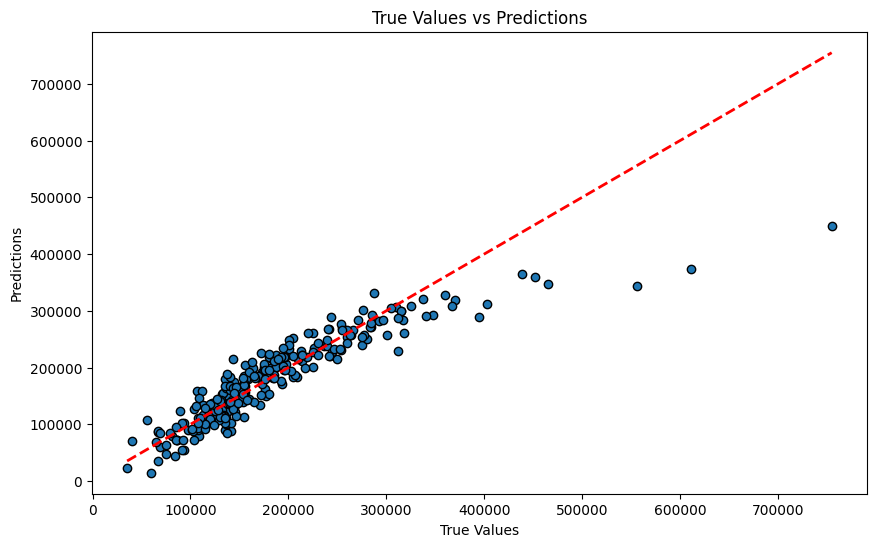

In [20]:
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor="black")
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="red",
    linestyle="--",
    lw=2,
)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()